In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

In [2]:
partial_sudokus = pd.read_csv('./partial_sudokus.csv')
partial_sudokus

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,8,3,2,3,5,4,1,7,0,...,3,0,0,0,0,1,0,0,0,8
1,1,0,0,7,5,4,0,3,2,0,...,4,4,0,3,6,2,8,1,8,0
2,3,0,0,0,5,0,8,3,9,8,...,2,5,8,6,0,0,0,0,0,7
3,0,0,0,0,9,3,0,0,7,8,...,4,4,0,0,2,1,8,0,5,6
4,6,8,0,7,3,0,0,9,0,8,...,0,7,4,0,8,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,8,9,6,0,0,0,5,7,6,...,0,8,6,0,3,0,0,7,1,5
49996,7,4,1,3,0,9,0,0,8,0,...,9,4,9,0,0,0,5,0,1,0
49997,2,0,0,4,8,3,9,1,0,1,...,0,0,0,6,5,0,2,0,5,4
49998,9,0,8,2,0,0,0,0,0,0,...,2,0,9,0,1,7,0,0,0,0


In [3]:
import pandas as pd

def sudoku_edges_dict(df):
    edges_dict = {}

    for a in range(81):
        #flattened_grid = row.values

        # Iterate over each cell in the Sudoku grid
        for i in range(81):
            row, col = divmod(i, 9)

            src_id = i
            dst_ids = set()  # Use a set to store unique values

            # Add dst_ids within the same row for the src_id
            for j in range(9):
                if j != col:
                    dst_ids.add(row * 9 + j)

            # Add dst_ids within the same column for the src_id
            for j in range(9):
                if j != row:
                    dst_ids.add(j * 9 + col)

            # Add dst_ids within the same 3x3 block for the src_id
            block_row, block_col = row // 3, col // 3
            for j in range(3):
                for k in range(3):
                    if i != (block_row * 3 + j) * 9 + (block_col * 3 + k):
                        dst_ids.add((block_row * 3 + j) * 9 + (block_col * 3 + k))

            # Update the dictionary with src_id and its corresponding dst_ids
            edges_dict[src_id] = list(dst_ids)

    return edges_dict


edges_dict = sudoku_edges_dict(partial_sudokus.iloc[0:2])
print("Edges Dictionary:")
for src_id, dst_ids in edges_dict.items():
    print(f"Node {src_id}: {dst_ids}")

# src_ids, dst_ids = sudoku_edges(partial_sudokus.iloc[0:1])
# print("src_ids:", src_ids)
# print("dst_ids:", dst_ids)

print(edges_dict)

Edges Dictionary:
Node 0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 18, 19, 20, 27, 36, 45, 54, 63, 72]
Node 1: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 18, 19, 20, 28, 37, 46, 55, 64, 73]
Node 2: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 18, 19, 20, 29, 38, 47, 56, 65, 74]
Node 3: [0, 1, 2, 4, 5, 6, 7, 8, 12, 13, 14, 21, 22, 23, 30, 39, 48, 57, 66, 75]
Node 4: [0, 1, 2, 3, 5, 6, 7, 8, 12, 13, 14, 21, 22, 23, 31, 40, 49, 58, 67, 76]
Node 5: [0, 1, 2, 3, 4, 6, 7, 8, 12, 13, 14, 21, 22, 23, 32, 41, 50, 59, 68, 77]
Node 6: [0, 1, 2, 3, 4, 5, 7, 8, 15, 16, 17, 24, 25, 26, 33, 42, 51, 60, 69, 78]
Node 7: [0, 1, 2, 3, 4, 5, 6, 8, 15, 16, 17, 24, 25, 26, 34, 43, 52, 61, 70, 79]
Node 8: [0, 1, 2, 3, 4, 5, 6, 7, 15, 16, 17, 24, 25, 26, 35, 44, 53, 62, 71, 80]
Node 9: [0, 1, 2, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 27, 36, 45, 54, 63, 72]
Node 10: [0, 1, 2, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 28, 37, 46, 55, 64, 73]
Node 11: [0, 1, 2, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 38, 47, 56, 65, 74

In [4]:
# Determine the size of the adjacency matrix
num_nodes = len(edges_dict)
adjacency_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.int)

# Fill the adjacency matrix based on edges_dict
for node, neighbors in edges_dict.items():
    adjacency_matrix[node, neighbors] = 1.0

# Print the adjacency matrix
adjacency_matrix.shape

torch.Size([81, 81])

In [5]:
adjacency_matrix

tensor([[0, 1, 1,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 1],
        [0, 0, 0,  ..., 1, 0, 1],
        [0, 0, 0,  ..., 1, 1, 0]], dtype=torch.int32)

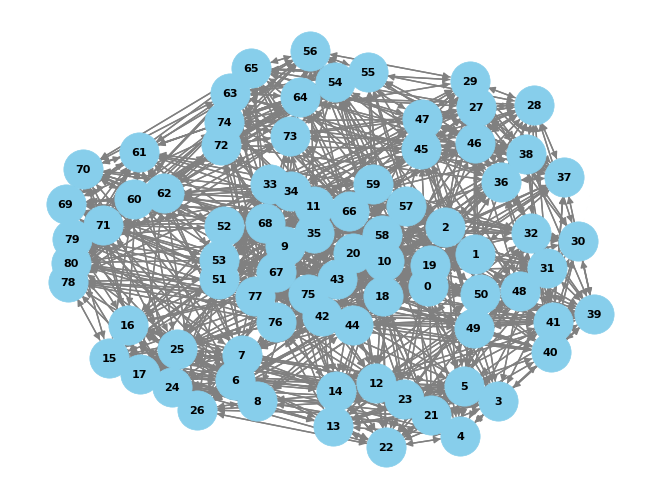

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes and edges to the graph
for node, neighbors in edges_dict.items():
    G.add_node(node)
    G.add_edges_from([(node, neighbor) for neighbor in neighbors])

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8, edge_color='gray', linewidths=0.5)

# Show the plot
plt.show()

In [7]:
filled_sudokus = pd.read_csv('./filled_sudokus.csv')
filled_sudokus

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,8,8,3,2,9,5,4,1,7,4,...,1,2,5,7,9,1,3,4,4,8
1,1,6,9,7,5,4,8,3,2,3,...,4,4,9,7,6,2,5,1,8,3
2,7,1,2,6,5,4,8,3,9,8,...,2,5,8,6,2,4,9,3,1,7
3,2,7,4,5,9,3,6,8,7,8,...,4,4,9,7,2,1,8,3,5,2
4,6,5,2,7,3,4,8,9,1,3,...,9,7,4,6,8,8,9,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,8,9,5,2,4,3,5,7,6,...,2,8,6,4,3,9,2,7,1,5
49996,7,4,1,3,5,9,2,6,8,9,...,9,4,9,3,8,6,5,7,1,2
49997,2,5,7,4,6,3,9,1,8,1,...,9,8,9,6,3,7,2,1,5,4
49998,9,3,8,2,5,7,1,4,6,1,...,2,2,9,6,8,7,8,4,3,5


In [8]:
train_sudokus = pd.DataFrame({
    'partialsudokus': partial_sudokus.apply(lambda row: (''.join(map(str, row))), axis=1),
    'filledsudokus': filled_sudokus.apply(lambda row: (''.join(map(str, row))), axis=1)
})

train_sudokus

,partialsudokus,filledsudokus
0,0832354170018000590350008620700009000000700203...,8832954174218673597953418625721349868465791233...
1,1007540320002060070048390500070780000405903100...,1697548323582169472748396515314782967465923189...
2,3000508398000230409300782002798004000004970266...,7126548398659237419342782652798614533584871266...
3,0000930078030000290590824039003502036001007088...,2745936878637415297596824139783542616351297481...
4,6807300908986000070370002560003456020000080742...,6527348913986524374371982569713456823852619742...
...,...,...
49995,0896000576200008000408102060107098239020800000...,1895243576279351845438172964167598239724835613...
49996,7413090080050800402300000708000360276570481903...,7413592689657823412386149757895364276572488933...
49997,2004839101040080000800057034200030080008064979...,2574639181347986256892157438219573863758264919...
49998,9082000000024609706748000507000193800000025003...,9382571461524639786748912537256193844593825173...


In [9]:
train_sudokus.to_csv('./train_sudokus.csv')

In [10]:
test_sudokus = pd.read_csv('./test_sudokus.csv')
test_sudokus

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,2,0,7,0,1,3,4,0,0,8,...,0,4,0,2,0,8,0,3,0,0
1,0,0,2,0,8,0,0,4,7,0,...,0,0,8,6,0,7,0,5,0,0
2,0,0,0,0,4,6,3,0,0,4,...,5,0,4,5,0,6,0,0,7,0
3,0,0,4,5,0,0,0,0,6,1,...,7,0,7,3,4,0,0,2,0,0
4,0,0,8,0,0,3,0,0,0,0,...,8,1,0,0,8,4,7,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,0,1,0,0,2,7,8,0,0,...,9,0,1,2,0,0,8,5,0,0
9996,0,0,0,0,7,2,6,0,9,0,...,0,5,0,0,0,2,0,0,0,0
9997,8,8,7,5,0,0,0,0,3,0,...,0,3,6,8,0,0,0,0,4,1
9998,7,0,0,4,1,0,0,9,8,0,...,0,0,7,2,0,0,3,4,0,0


In [11]:
data = pd.read_csv('./train_sudokus.csv')
data

,Unnamed: 0,partialsudokus,filledsudokus
0,0,0832354170018000590350008620700009000000700203...,8832954174218673597953418625721349868465791233...
1,1,1007540320002060070048390500070780000405903100...,1697548323582169472748396515314782967465923189...
2,2,3000508398000230409300782002798004000004970266...,7126548398659237419342782652798614533584871266...
3,3,0000930078030000290590824039003502036001007088...,2745936878637415297596824139783542616351297481...
4,4,6807300908986000070370002560003456020000080742...,6527348913986524374371982569713456823852619742...
...,...,...,...
49995,49995,0896000576200008000408102060107098239020800000...,1895243576279351845438172964167598239724835613...
49996,49996,7413090080050800402300000708000360276570481903...,7413592689657823412386149757895364276572488933...
49997,49997,2004839101040080000800057034200030080008064979...,2574639181347986256892157438219573863758264919...
49998,49998,9082000000024609706748000507000193800000025003...,9382571461524639786748912537256193844593825173...


In [12]:
train_sudokus = pd.DataFrame(data.iloc[:, 1:3])
train_sudokus

,partialsudokus,filledsudokus
0,0832354170018000590350008620700009000000700203...,8832954174218673597953418625721349868465791233...
1,1007540320002060070048390500070780000405903100...,1697548323582169472748396515314782967465923189...
2,3000508398000230409300782002798004000004970266...,7126548398659237419342782652798614533584871266...
3,0000930078030000290590824039003502036001007088...,2745936878637415297596824139783542616351297481...
4,6807300908986000070370002560003456020000080742...,6527348913986524374371982569713456823852619742...
...,...,...
49995,0896000576200008000408102060107098239020800000...,1895243576279351845438172964167598239724835613...
49996,7413090080050800402300000708000360276570481903...,7413592689657823412386149757895364276572488933...
49997,2004839101040080000800057034200030080008064979...,2574639181347986256892157438219573863758264919...
49998,9082000000024609706748000507000193800000025003...,9382571461524639786748912537256193844593825173...


In [13]:
# Function to check length
def check_length(sudoku_str):
    return len(sudoku_str) == 81

# Applying the check_length function to each element in the specified columns
partial_lengths = data['partialsudokus'].apply(lambda x: check_length(x))
filled_lengths = data['filledsudokus'].apply(lambda x: check_length(x))

# Display the results
print("Rows with Incorrect Partial Sudokus Length:")
print(data[~partial_lengths])

print("\nRows with Incorrect Filled Sudokus Length:")
print(data[~filled_lengths])

Rows with Incorrect Partial Sudokus Length:
Empty DataFrame
Columns: [Unnamed: 0, partialsudokus, filledsudokus]
Index: []

Rows with Incorrect Filled Sudokus Length:
Empty DataFrame
Columns: [Unnamed: 0, partialsudokus, filledsudokus]
Index: []


In [14]:
def create_constraint_mask():
    constraint_mask = torch.zeros((81, 3, 81), dtype=torch.float)
    # row constraints
    for a in range(81):
        r = 9 * (a // 9)
        for b in range(9):
            constraint_mask[a, 0, r + b] = 1

    # column constraints
    for a in range(81):
        c = a % 9
        for b in range(9):
            constraint_mask[a, 1, c + 9 * b] = 1

    # box constraints
    for a in range(81):
        r = a // 9
        c = a % 9
        br = 3 * 9 * (r // 3)
        bc = 3 * (c // 3)
        for b in range(9):
            r = b % 3
            c = 9 * (b // 3)
            constraint_mask[a, 2, br + bc + r + c] = 1

    return constraint_mask

In [232]:
class SudokuDataset(Dataset):
    def __init__(self, dataframe, subset="train"):
        self.dataframe = dataframe
        self.subset = subset

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        puzzle = self.dataframe.iloc[idx, 1]
        solution = self.dataframe.iloc[idx, 2]
        #print(puzzle)
        puzzle = torch.tensor([int(p) for p in str(puzzle)], dtype=torch.float32).reshape(1, 9, 9) / 9 - 0.5
        #puzzle = torch.tensor([int(p) for p in str(puzzle)], dtype=torch.float32).reshape(1, 9, 9) #Loss gets too high
        #print(puzzle)
        if self.subset == 'train':
            # Subtracting 1 from each solution value to match PyTorch's 0-based indexing
            #solution = torch.tensor([max(0, int(s) - 1) for s in solution], dtype=torch.int64).reshape(-1)
            solution = torch.tensor([int(s) - 1 for s in str(solution)], dtype=torch.int64).reshape(81)
            #print(solution)
            return puzzle, solution
        return puzzle

In [233]:
train_idx = int(len(data) * 0.75)
train_data = SudokuDataset(data.iloc[:train_idx], subset="train")
#train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

val_data = SudokuDataset(data.iloc[train_idx:], subset="train")
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

In [234]:
import torch.nn as nn
import torch.nn.functional as F

class SudokuSolver(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(SudokuSolver, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=1)
        self.fc1 = nn.Linear(128 * 9 * 9, 81 * 9)
        self.dropout = nn.Dropout(p=dropout_prob)
        
        # Fix: Set a specific value for the embedding dimension
        # embedding_dim = 128  # Adjusted to match the size of the output channels from conv3
        # self.adjacency_embedding = nn.Embedding(adjacency_matrix_size, embedding_dim)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = x.view(-1, 9)  # Reshaped to match [batch_size * 81, 9]

        # # Embed the adjacency matrix
        # adjacency_embedding = self.adjacency_embedding(adjacency_matrix)

        # # Expand dimensions to match the shape of x
        # adjacency_embedding = adjacency_embedding.unsqueeze(-1).unsqueeze(-1)

        # # Add the adjacency information to the output
        # x = x + adjacency_embedding

        return x

#model = SudokuSolver(adjacency_matrix_size=81)
model = SudokuSolver()

In [215]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.downsample(identity)
        out = self.relu(out)
        return out

class ResNetSudokuSolver(nn.Module):
    def __init__(self):
        super(ResNetSudokuSolver, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.residual_block1 = ResidualBlock(64, 64)
        self.residual_block2 = ResidualBlock(64, 64)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, 81 * 9)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.residual_block1(x)
        x = self.residual_block2(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = x.view(-1, 9)  # Reshaped to match [batch_size * 81, 9]
        return x

# Create an instance of the ResNetSudokuSolver model
model = ResNetSudokuSolver()


In [235]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [236]:
import torch.optim.lr_scheduler as lr_scheduler

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, dim=1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

def train_model(model, train_loader, val_loader, epochs, adjacency_matrix, plots):
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        total_train = 0
        # Training Phase
        for puzzles, solutions in train_loader:
            puzzles, solutions = puzzles.to(device), solutions.to(device)
            
            # # Pass the adjacency matrix to the model
            # adjacency_matrix = adjacency_matrix.to(device)
            #print(puzzles.shape)
            optimizer.zero_grad()
            outputs = model(puzzles)
            # print('outputs :', outputs)
            #print('sols :', solutions.view(-1))
            loss = criterion(outputs, solutions.view(-1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            
            train_correct += calculate_accuracy(outputs, solutions.view(-1)) * solutions.size(0)
            total_train += solutions.size(0)

        avg_train_loss = train_loss / len(train_loader)
        train_loss_list.append(avg_train_loss)
        train_accuracy = train_correct / total_train
        train_acc_list.append(train_accuracy)
        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        total_val = 0

        with torch.no_grad():
            for puzzles, solutions in val_loader:
                puzzles, solutions = puzzles.to(device), solutions.to(device)
                outputs = model(puzzles)
                val_loss += criterion(outputs, solutions.view(-1)).item()
                
                val_correct += calculate_accuracy(outputs, solutions.view(-1)) * solutions.size(0)
                total_val += solutions.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_loss_list.append(avg_val_loss)
        val_accuracy = val_correct / total_val
        val_acc_list.append(val_accuracy)
        
        #scheduler.step(avg_val_loss)

        print(f'Epoch {epoch + 1}: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train Accuracy: {train_accuracy:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')
 
    if plots:
        plt.plot(range(1, epochs + 1), train_loss_list, label='Train Loss')
        plt.plot(range(1, epochs + 1), val_loss_list, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(range(1, epochs + 1), train_acc_list, label='Train Accuracy')
        plt.plot(range(1, epochs + 1), val_acc_list, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

CNN Training

Epoch 1: Train Loss: 1.9375, Train Accuracy: 0.2530, Validation Loss: 1.4531, Validation Accuracy: 0.4926
Epoch 2: Train Loss: 1.2901, Train Accuracy: 0.5490, Validation Loss: 1.0177, Validation Accuracy: 0.6590
Epoch 3: Train Loss: 1.0374, Train Accuracy: 0.6441, Validation Loss: 0.8722, Validation Accuracy: 0.7027
Epoch 4: Train Loss: 0.9247, Train Accuracy: 0.6807, Validation Loss: 0.8114, Validation Accuracy: 0.7178
Epoch 5: Train Loss: 0.8647, Train Accuracy: 0.6996, Validation Loss: 0.7853, Validation Accuracy: 0.7227
Epoch 6: Train Loss: 0.8275, Train Accuracy: 0.7124, Validation Loss: 0.7738, Validation Accuracy: 0.7237
Epoch 7: Train Loss: 0.8011, Train Accuracy: 0.7213, Validation Loss: 0.7669, Validation Accuracy: 0.7251
Epoch 8: Train Loss: 0.7809, Train Accuracy: 0.7284, Validation Loss: 0.7634, Validation Accuracy: 0.7251
Epoch 9: Train Loss: 0.7651, Train Accuracy: 0.7343, Validation Loss: 0.7613, Validation Accuracy: 0.7257


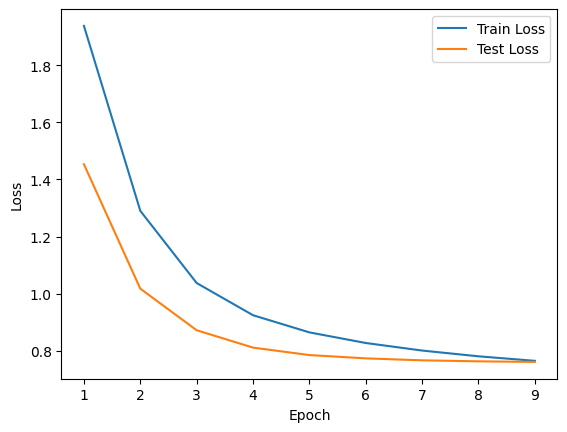

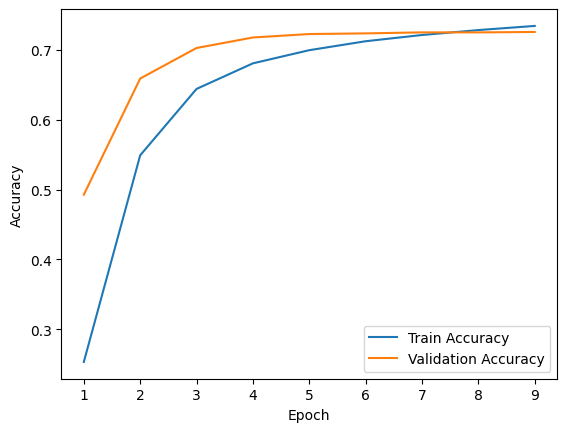

In [237]:
train_model(model, train_loader, val_loader, 9, adjacency_matrix, plots = True)

In [238]:
model

SudokuSolver(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=10368, out_features=729, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

After 9th epoch, for CNN, train accuracy overshoots validation accuracy and it starts overfitting
lr=0.001, batch size 32, 

ResNet Training

Epoch 1: Train Loss: 2.1967, Train Accuracy: 0.1230, Validation Loss: 2.1902, Validation Accuracy: 0.1308
Epoch 2: Train Loss: 2.1605, Train Accuracy: 0.1500, Validation Loss: 2.1297, Validation Accuracy: 0.1631
Epoch 3: Train Loss: 2.0872, Train Accuracy: 0.1799, Validation Loss: 2.0638, Validation Accuracy: 0.1842
Epoch 4: Train Loss: 2.0337, Train Accuracy: 0.1976, Validation Loss: 2.0277, Validation Accuracy: 0.1973
Epoch 5: Train Loss: 2.0036, Train Accuracy: 0.2078, Validation Loss: 2.0028, Validation Accuracy: 0.2049
Epoch 6: Train Loss: 1.9820, Train Accuracy: 0.2155, Validation Loss: 1.9900, Validation Accuracy: 0.2101
Epoch 7: Train Loss: 1.9639, Train Accuracy: 0.2217, Validation Loss: 1.9762, Validation Accuracy: 0.2136
Epoch 8: Train Loss: 1.9478, Train Accuracy: 0.2272, Validation Loss: 1.9620, Validation Accuracy: 0.2186
Epoch 9: Train Loss: 1.9339, Train Accuracy: 0.2319, Validation Loss: 1.9541, Validation Accuracy: 0.2207
Epoch 10: Train Loss: 1.9223, Train Accuracy: 

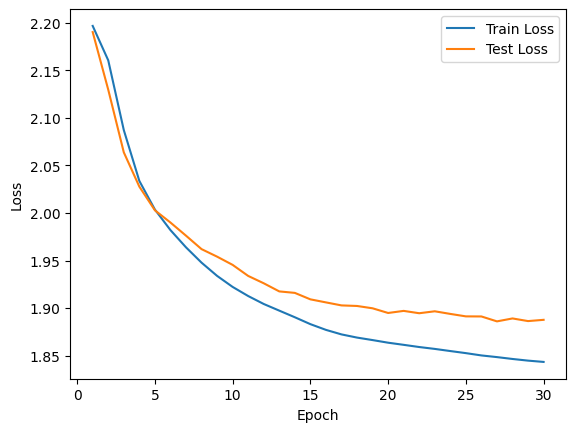

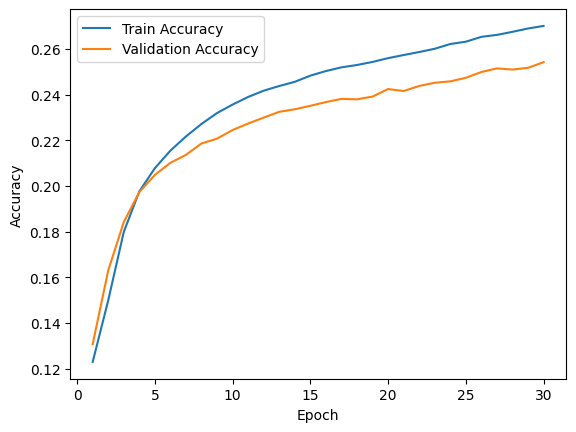

In [218]:
train_model(model, train_loader, val_loader, 30, adjacency_matrix, plots = True)

In [222]:
model

ResNetSudokuSolver(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (residual_block1): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential()
  )
  (residual_block2): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 

In [223]:
import pandas as pd
test=pd.read_csv('./test_sudokus.csv')
test_sudokus = pd.DataFrame({
    'partialsudokus': test.apply(lambda row: (''.join(map(str, row))), axis=1),
})

test_sudokus

,partialsudokus
0,2070134008060482359030068000900500201084705600...
1,0020800470041007088078060032607000007052000163...
2,0000463004009137560530280090040070020806000400...
3,0045000061078634002000405803096847007059306100...
4,0080030000009203063005007200081026500020090006...
...,...
9995,3010027800080360700090050000004200900205798300...
9996,0000726090050800400004000500000180409002078168...
9997,8875000030000870045340862070050310009030401000...
9998,7004100980903020000280000462406000853014576040...


In [224]:
# Function to check length
def check_length(sudoku_str):
    return len(sudoku_str) == 81

# Applying the check_length function to each element in the specified columns
partial_lengths = data['partialsudokus'].apply(lambda x: check_length(x))

# Display the results
print("Rows with Incorrect Partial Sudokus Length:")
print(data[~partial_lengths])


Rows with Incorrect Partial Sudokus Length:
Empty DataFrame
Columns: [Unnamed: 0, partialsudokus, filledsudokus]
Index: []


In [225]:
def preprocess_puzzle(puzzle_str):

    puzzle_tensor = torch.tensor([int(p) for p in puzzle_str], dtype=torch.float32).reshape(1, 1, 9, 9) / 9 - 0.5
    return puzzle_tensor.to(device)

def predict_test_set(model, test_df):
    model.eval()
    predictions = []

    for _, row in test_df.iterrows():
        #print(row)
        puzzle_str = row['partialsudokus']
        with torch.no_grad():
            puzzle_tensor = preprocess_puzzle(puzzle_str)
            output = model(puzzle_tensor)
            solution = output.argmax(dim=1).view(9, 9) + 1  # Convert predictions to 1-based indexing
            predictions.append(solution.cpu().numpy())

    return predictions

# predict on the entire test set
predicted_solutions = predict_test_set(model, test_sudokus)

In [227]:
indexes = []
labels= []
for i,j in enumerate(predicted_solutions):
    preds = j.reshape(9,9)
    for row in range(0,9):
        for col in range(0,9):
            index = str(i)+"_"+str(row)+str(col)
            indexes.append(index)
            labels.append(preds[row,col])

In [228]:
test_predictions =  {"id":indexes , "values":labels}
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,id,values
0,0_00,3
1,0_01,2
2,0_02,6
3,0_03,9
4,0_04,8
...,...,...
809995,9999_84,3
809996,9999_85,5
809997,9999_86,7
809998,9999_87,7


In [229]:
test_predictions.to_csv("Submission_Task2_ResNet.csv", index=False)

### Summary
* Identified each digit in sudoku grid with task1approach1 model and concatenated them into strings for both inputs(train and test) and labels into a dataframe
* Normalised each digit in inputs(train and test) to be within range of -0.5 and 0.5
* Using CNN model to learn the sudoku rules from training data and predict thus for test data
* Converted the test data back into format suitable for submission file

| Task 2     | Model  | Accuracy(locally) | Accuracy(kaggle) |
|:--------:|:------:|:----------:|:----------:|
| Approach 1     | CNN  | 72% |  73%  |
| Approach 2     | ResNet  | 28% |   11%|